# Magnetic fields in MRI

The magnetic fields created and manipulated during a MRI experiment critically determine the entire MRI experiment.  We will provide some background on creating and detecting magnetic fields, and then describe the magnetic fields present in MRI systems.

In [2]:
% setup MRI-education-resources path and requirements
cd ../
startup

loading image
loading signal


## Learning Goals

1. Describe the 4 fundmanetal components of a MRI scan and why they are necessary
    * Define the magnetic fields created by various components
    * Describe the purpose of each magnetic field created
1. Understand what MRI is measuring
    * Describe how RF coils receive MRI signal


## Loop currents and magnetic fields
Magnetic fields, $\vec{B}$, can be created by current, $I$, through loop of wire, governed by the principles of electromagnetism in Maxwell's equations.  The the "left-hand rule" determines the direction of the magnetic field.

![loop%20small%20current.png](images/loop_small_current.png)

By increasing the current, the magnetic field is increased

![loop%20big%20current.png](images/loop_big_current.png)

We can also link many loops together (a “solenoid”) to increase the extent of the magnetic field.

![solenoid%20small%20current.png](images/solenoid_small_current.png)

A solenoid design is typically used to create the main magnetic field for MRI, $B_0$, to create a large region in space with a homogeneous magnetic field, as required for MRI across a volume.

## Main Magnet - $B_0$

The main magnetic field is created with solenoid coils, shown above, that can provide a large region in space where there is large, homogeneous magnetic field.  
The large magnetic field is required to create stronger polarization.
The large region is psace determines where we can create an image.
And having a homogeneous magnet ensures there are no image distortion artifacts.

This magnet creates magnetic fields of usually 1.5 or 3 T, by convention oriented in the z-direction, and this field is always on.  Mathematically, we can add this to our magnetic field vector:

$$\vec{B}(\vec{r},t) = 
\begin{bmatrix}
0 \\
0 \\
B_0 
\end{bmatrix}$$

## Magnetic field gradient coils - $\vec{G}(t)$

The magnetic field gradient coils are designed to add and subtract from the main magnetic field.  In this way, they create a spatially varying magnetic field.  Since the frequency of magnetic resonance is proportional to the magnetic field, this means that when the gradients are on the resonance frequency varies as function of position.  This gives us a way to separate signals from different regions based on resonance frequency, and create images.

The gradient coil fields have a maximum amplitude of around 50 mT/m = 0.05 T/m, aligned with $B_0$ in the z-direction, and this field is switched on and off during MRI experiments.  The gradients are typically varied every few ms, with minimum switching times around 0.1 ms.  Mathematically, we can add this to our magnetic field vector:

$$\vec{B}(\vec{r},t) = 
\begin{bmatrix}
0 \\
0 \\
B_0 + \vec{G}(t) \cdot \vec{r}
\end{bmatrix}$$

Where the gradients creates linear changes in the z-component of the magnetic field, $B_Z$, across space.

## Radiofrequency (RF) coils - $B_1^+(\vec{r},t) B_1^-(\vec{r},t)$

The purpose of the RF coils and RF systems are

1. Excitation – perturb the net magnetization from equilibrium by creating magnetic fields at the resonance frequency
1. Reception – after excitation, the precessing net magnetization creates magnetic fields at the resonance frequency

These are called RF coils since the resonance frequencies for MRI, typically around 100 MHz, is in the so-called radio-frequency (RF) range.  Their amplitude is much smaller than the other magnetic fields, typically in the 10 $\mu$T = .00001 T range.  The magnetic fields created by the RF coils are oriented perpedicularly to the main magnetic field, and thus are in the transverse (XY) plane.  Mathematically, we add this final magnetic field as

$$\vec{B}(\vec{r},t) = 
\begin{bmatrix}
B_{1,X}^+(\vec{r},t) \cos(2\pi\bar{\gamma} B_0 t) \\
B_{1,Y}^+(\vec{r},t) \sin(2\pi\bar{\gamma} B_0 t) \\
B_0 + \vec{G}(t) \cdot \vec{r}
\end{bmatrix}$$

Note that the sin/cos in the magnetic field represent a rotation of the RF field at the Larmor frequency, $f_0 = \bar{\gamma} B_0$.

The RF system is divided up into transmit and receive paths.  All components are tuned to Larmor frequency, meaning they are most sensitive to transmitting or receiving signals at this frequency.  Reactive components (capacitors and inductors) are used for tuning to the correct frequency.

### Transmit (Tx) system for excitation - $B_1^+(\vec{r},t)$

- Transmit high power (10s of kW) RF signals
- Key requirement is homogeneity, i.e. same magnetic field that creates the same flip angle across imaging FOV
- Usually a single larger, coil surrounding entire FOV


### Receive (Rx) system for reception - $B_1^-(\vec{r},t)$

- Receive small signals (mV) arising from body
- Key requirement is high sensitivity to detect small signals with the least noise
- Usually an array of smaller coil elements (also known as channels), placed around the body




### Creating Transmit RF fields

To create transmit RF fields, we simply put an oscillating electric current into a loop of wire, which is simulated below.  When this is performed at the Larmor frequency, this creates RF excitation.

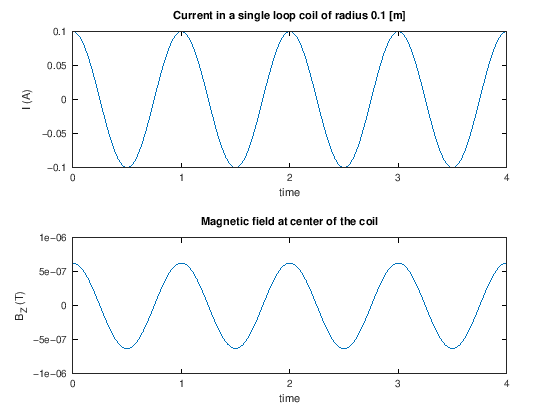

In [1]:
R = .1; % coil radius [m]
I0 = 0.1; % current amplitude [amps]
mu0 = 4*pi*1e-7; % T⋅m/A; 

t = linspace(0,4, 401);
I = cos(2*pi*t) * I0;


BZ = mu0 * I / (2*R);    % magnetic field at the center of a single loop

subplot(211)
plot(t,I)
ylabel('I (A)')
xlabel('time')
title(['Current in a single loop coil of radius ' num2str(R) ' [m]'])
subplot(212)
plot(t,BZ)
ylabel('B_Z (T)')
xlabel('time')
title(['Magnetic field at center of the coil'])


### Receiving Magnetic Resonance Signal

Magnetic resonsance signal is received by the following sequence of events

1. Spins and the net magnetization, $\vec{M}$, in a magnetic field will precess at the Larmor frequency, which depends on the gyromagnetic ratio and main magnetic field: $f_0 = \\bar{gamma} B_0$
1. This precession creates oscillating magnetic fields at this same (Larmor) frequency.
1. Oscillating magnetic fields will create oscillating current in loops of wire, which can be detected by amplifying and digitizing this signal

![RF%20reception.gif](images/RF_reception.gif)


### Reciprocity

The principle of reciprocity in electromagnetism tells us that the same relationships govern creating magnetic fields from oscillating currents and creating electric currents from oscillating magnetic fields.  So far we have discussed that an oscillating current in a loop of wire will create an oscillating magnetic field, which describes the transmit RF process.  So, reciprocity says that an oscillating magnetic field will create a current in a loop of wire.  This describe the receive RF process, as shown above.


## RF Coils

### Transmit (Tx) RF coils
- Typically performed with “BODY” coil
- Birdcage design
- Provides homogeneous magnetic field amplitude
- Creates magnetic fields perpendicular to B0

In MRI we denote transmitted magnetic fields from RF energy as

$$B_1^+(\vec{r},t)$$

This field is typically in units of millitesla (mT) and can vary over space, $\vec{r}$ and time, $t$

![BODY coil](images/BODY_coil.png)

### Receive (Rx) RF coils
- Tailored to the anatomy of interest, e.g. knee coils, abdomen coils, head coils
- Configured in arrays (or "phased arrays")
- Between 8 to 64 individual coil elements (also known as channels) in a array coil is common
- Elements should be relatively isolated and decoupled to not interfere with each other
- Tuned to the Larmor frequency when receiving signals
- Detuned (turned off) when transmit RF is active so they don’t interfere
- *Goal is to provide high sensitivity to receive MR signals by placing them as close as possible to the body*

In MRI we denote senitivity profile to varying magnetic fields of the RF receiver coils as

$$B_{1,n}^-(\vec{r},t)$$

This sensitivity is typically in units of millitesla/Amp (mT/A) and can vary over space, $\vec{r}$, time, $t$, and coil element, $n$, in the array coil.

![Receive array](images/TIM_receive_array.png)
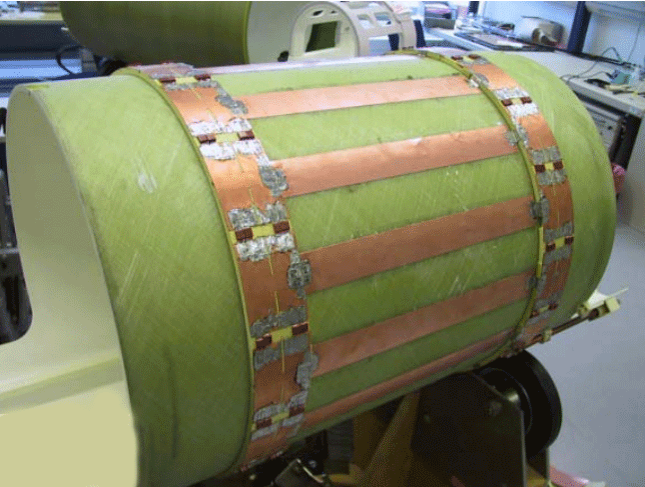
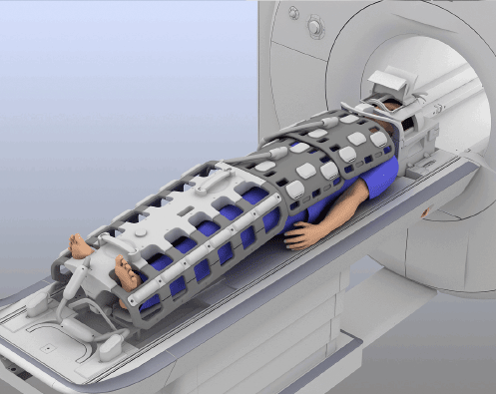

## RF Coil Profiles

### Receive elements

Coil elements are most sensitive to signals originating near the element, and the so-called sensitivity off as we move away from the coil.  The following images show that each element is most sensitive, or has the brightest image, closest to that element:

![Spine Array](images/SpineArray.png)

### Sensitivity Simulation

The following simulates the sensitivity profile of a single loop RF coil varying over space.  In the following plots, the magnetic field vector, $\vec{B}(\vec{r}) = [B_X(\vec{r}), B_Y(\vec{r}), B_Z(\vec{r})]$, that is created by the coil is plotted, as well as the magnetic field amplitude, $\|\vec{B}(\vec{r})\|$. 
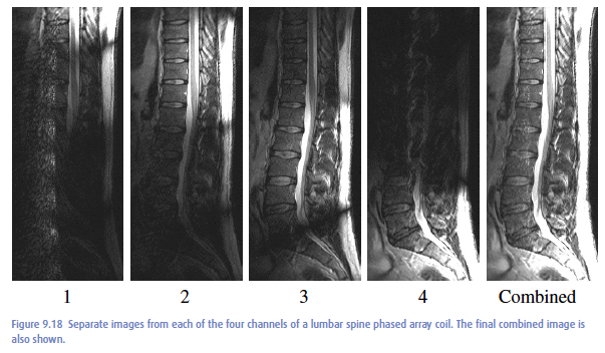

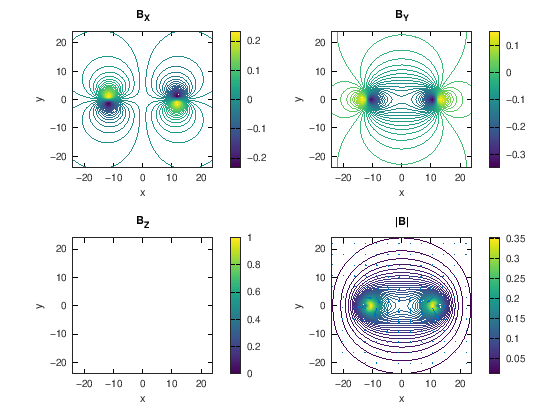

In [5]:
R = 12; % coil radius, cm
I = 3; % current in the coil
flag_2d = 1; % just plot 2D profile

[BX, BY, BZ, xp,yp, zp] = loop_coil_field(R, I, flag_2d);

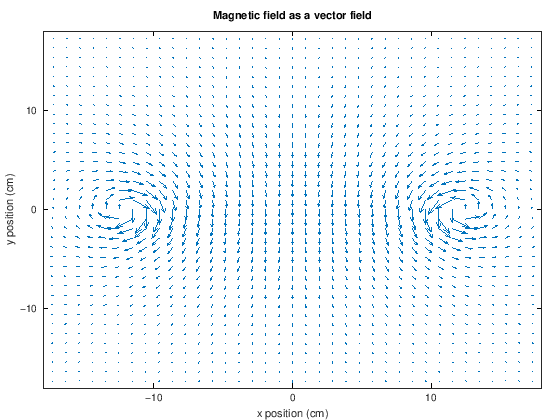

In [14]:
% plot the vector field

quiver(xp,yp, BX, BY, 1.4)
axis([-18 18 -18 18])
xlabel('x position (cm)')
ylabel('y position (cm)')
title('Magnetic field as a vector field')

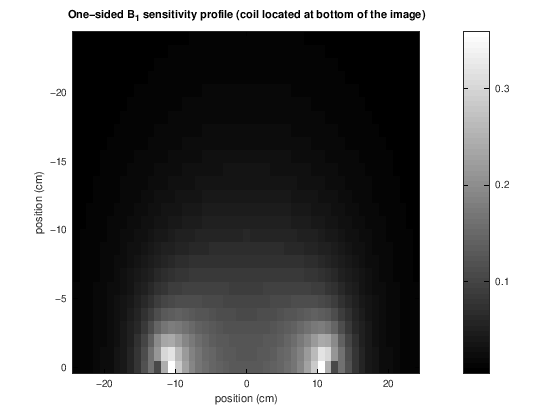

In [6]:
Bmag = sqrt(BX.^2+BY.^2+BZ.^2);
xhalf = round(length(xp)/2);

imagesc(yp, xp(1:xhalf), Bmag(1:xhalf,:))
xlabel('position (cm)')
ylabel('position (cm)')
axis tight
colormap(gray),colorbar
title('One-sided B_1 sensitivity profile (coil located at bottom of the image)')